# single Variable Linear Regression

* 정의 : sample data를 가장 잘 설명할 수 있는 w, b를 찾는 Linear 모델을 구현한다.
* f(x) : wx + b, ex) w = 0.2, b = 1
* loss_funtion : Mean Squared Error 1/n *sum((f(x) - y) ^ 2)
* gradient 함수 : 중앙차분, (f(w + h) - f(w - h)) / 2h => (loss_funtion(w + h) - loss_funtion(w - h)) / (2 * h)
* gradient update : w = w - learning_rate * dE/dw
* 총 5개의 함수 필요

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x_data = np.array([1.0, 2.0, 3.0, 4.0, 5.0]).reshape(5,1)
y_data = np.array([2.0, 3.0, 4.0, 5.0, 6.0]).reshape(5,1)

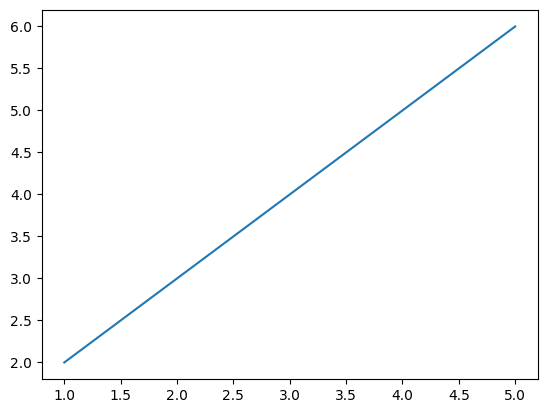

In [3]:
plt.plot(x_data, y_data)


In [4]:
weight = np.random.rand(1,1)
bias = np.random.rand(1)

In [5]:
x_data

array([[1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [6]:
bias

array([0.94467277])

In [7]:
def func1(x, weight, bias):
    return ((weight * x) + bias)

In [8]:
#구현 예제
func1(x_data[0], weight, bias)

array([[1.90315765]])

In [9]:
def loss_function(f, x, w, b, y):
    result = 0
    num_size = x.size
    for i in range(num_size):
        result = result + (f(x[i], w, b) - y[i]) ** 2
    return result.sum() / num_size
    

In [10]:
loss_function(func1, x_data, weight, bias, y_data)

0.03580115413243445

In [11]:
def grad(f, x, w, b, y, grad_name):
    h = 10e-10
    if grad_name == 'weight':
        return (loss_function(f, x, w + h, b, y) - loss_function(f, x, w - h, b, y)) / (2 * h)
    else:
        return (loss_function(f, x, w, b + h, y) - loss_function(f, x, w, b - h, y)) / (2 * h)

In [12]:
grad(func1, x_data, weight, bias, y_data, 'weight')

-1.2452958976505446

In [13]:
# gradient update : w = w - learning_rate * dE/dw
def grad_update(f, x, w, b, y, grad_name):
    update = (0.01 * grad(f, x, w, b, y, grad_name)) 
    w = w - update
    return w

In [14]:
grad_update(func1, x_data, weight, bias, y_data, 'weight')

array([[0.97093784]])

* do 1000 times
i = 0 
while(1000):
    weight_updated = grad_update(func1, x_data, weight, bias, y_data, 'weight')
    bias_updated = grad_update(func1, x_data, weight, bias, y_data, 'bias')
    if ((weight - weight_updated) ** 2 > 0.01):
        weight = weight_updated
        bias = bias_updated

    else:
        print("result = ", weight_updated[i], bias_updated[i])
        break
print(weight, bias)

In [15]:
i = 0 
weight_data = np.array([weight])
bias_data = np.array([bias])
while(True):
    weight_data = np.append(weight_data, np.array([grad_update(func1, x_data, weight_data[i], bias_data[i], y_data, 'weight')]))
    bias_data = np.append(bias_data, np.array([grad_update(func1, x_data, weight_data[i], bias_data[i], y_data, 'bias')]))
    if (abs(weight_data[i] - weight_data[i + 1])  < 10e-200):
        print("result = ", weight_data[i+1], bias_data[i+1])
        break
    else:
        i = i + 1


result =  0.9999999999999998 0.9999999999999998
